Name: Akkeem Tyrell
Date: 2025-09-09
Lab Partners: Isaiah Liverpool, Sean Robleto, Sherika

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [15]:
lab2_A = pd.read_csv('./data/lab02/phy213_lab02_partA.csv')
lab2_B = pd.read_csv('./data/lab02/phy213_lab02_partB.csv')

<h2 style="text-align: center;">Part A</h2>

In [16]:
lab2_A

,Reading,V (Volts),I (Amperes),R1 (ohms) = V/i
0,6.0,5.10,0.054,94.44
1,6.0,2.84,0.030,94.67
2,6.0,2.34,0.025,93.60
3,6.0,1.78,0.019,93.68
4,6.0,1.22,0.013,93.85


2. Compute the mean deviation for R<sub>1<sub> 

In [17]:
R1_values = lab2_A.iloc[:, -1]  # Gets the last column containing R1 values

# Calculate the absolute deviations from the mean
absolute_devations = np.abs(R1_values - np.mean(R1_values))

#Calculate the mean deviation from the absolute deviations
mean_deviation = np.mean(absolute_devations)

print(f"R1 Values: {R1_values.tolist()}")
print(f"Absolute Deviations: {absolute_devations.tolist()}")
print(f"Mean of R1 Values: {np.mean(R1_values):.3f}")
print(f"Mean Deviation for R1: {mean_deviation:.4f}")

R1 Values: [94.44, 94.67, 93.6, 93.68, 93.85]
Absolute Deviations: [0.3919999999999959, 0.6219999999999999, 0.4480000000000075, 0.367999999999995, 0.1980000000000075]
Mean of R1 Values: 94.048
Mean Deviation for R1: 0.4056


3. Draw a plot of the graph of the voltage vs the current, the voltage on the vertical axis and the current on the horizontal axis

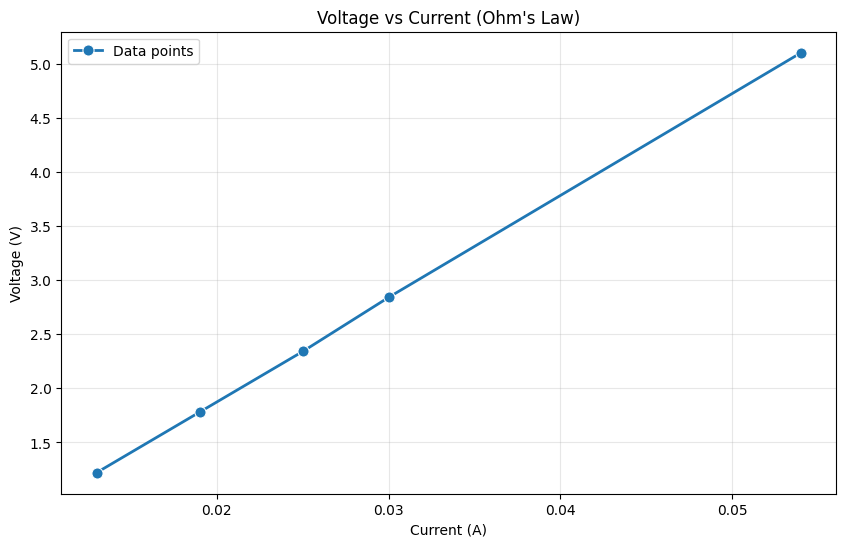

In [18]:
plt.figure(figsize=(10, 6))

# Use lineplot which combines scatter points and lines
# markers=True adds scatter points
# marker='o' sets point style to circles
# linewidth controls line thickness
sns.lineplot(data=lab2_A, x='I (Amperes)', y='V (Volts)', 
             markers=True, marker='o', markersize=8, 
             linewidth=2, label='Data points')

plt.xlabel('Current (A)') # Label for x-axis
plt.ylabel('Voltage (V)') # Label for y-axis
plt.title('Voltage vs Current (Ohm\'s Law)') # Title of the plot
plt.grid(True, alpha=0.3) # Light grid for better readability
plt.show() # Display the plot

Draw the best fit line through the data points and calculate the slope of the line. The slope of the line is equal to the resistance R. Compare this value with the average value of R1 calculated in part A. Are they consistent within the uncertainties? Explain.


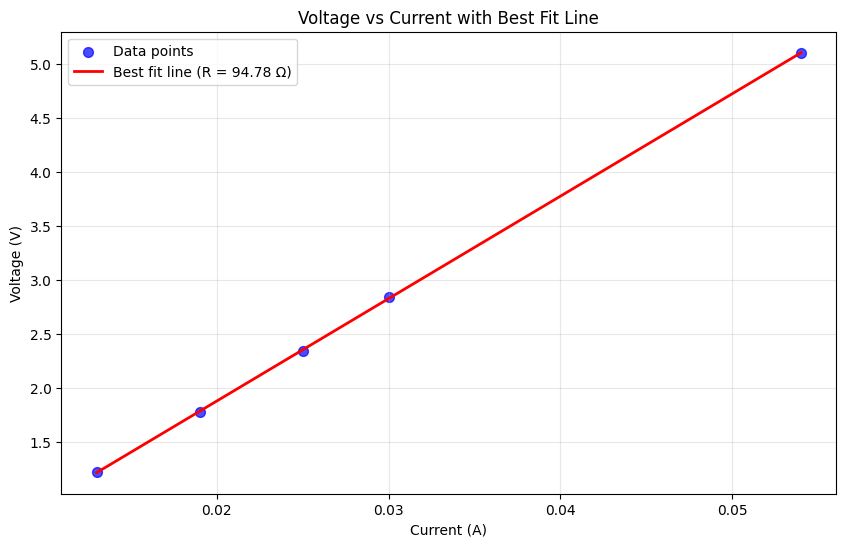

Slope (Resistance from best fit): 94.7768 Ω
Intercept: -0.016707 V
R-squared: 1.0000
Standard error of slope: 0.357047


In [19]:
# Create the plot with data points and best fit line
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(lab2_A['I (Amperes)'], lab2_A['V (Volts)'], 
           color='blue', s=50, alpha=0.7, label='Data points')

# Calculate linear regression (best fit line)
slope, intercept, r_value, p_value, std_err = stats.linregress(
    lab2_A['I (Amperes)'], lab2_A['V (Volts)'])

# Create the best fit line
x_fit = np.linspace(lab2_A['I (Amperes)'].min(), lab2_A['I (Amperes)'].max(), 100)
y_fit = slope * x_fit + intercept

# Plot the best fit line
plt.plot(x_fit, y_fit, 'r-', linewidth=2, 
         label=f'Best fit line (R = {slope:.2f} Ω)')

# Customize the plot
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current with Best Fit Line')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Display regression statistics
print(f"Slope (Resistance from best fit): {slope:.4f} Ω")
print(f"Intercept: {intercept:.6f} V")
print(f"R-squared: {r_value**2:.4f}")
print(f"Standard error of slope: {std_err:.6f}")

In [20]:
# Get the average R1 value from part A
R1_average = np.mean(R1_values)
R1_std_dev = np.std(R1_values, ddof=1)  # Sample standard deviation

# Calculate the difference
difference = abs(slope - R1_average)
relative_difference = (difference / R1_average) * 100

print("=== COMPARISON ANALYSIS ===")
print(f"Average R1 from Part A: {R1_average:.4f} Ω")
print(f"Standard deviation of R1: {R1_std_dev:.4f} Ω")
print(f"Resistance from best fit line: {slope:.4f} Ω")
print(f"Absolute difference: {difference:.4f} Ω")
print(f"Relative difference: {relative_difference:.2f}%")

# Check consistency within uncertainties
# Typically, values are consistent if they're within 2 standard deviations
uncertainty_threshold = 2 * R1_std_dev
is_consistent = difference <= uncertainty_threshold

print(f"\nUncertainty threshold (2σ): {uncertainty_threshold:.4f} Ω")
print(f"Are they consistent? {'Yes' if is_consistent else 'No'}")

if is_consistent:
    print("✓ The values are consistent within experimental uncertainties.")
else:
    print("✗ The values are NOT consistent within experimental uncertainties.")
    print("This could indicate systematic errors or limitations in the experimental setup.")

=== COMPARISON ANALYSIS ===
Average R1 from Part A: 94.0480 Ω
Standard deviation of R1: 0.4785 Ω
Resistance from best fit line: 94.7768 Ω
Absolute difference: 0.7288 Ω
Relative difference: 0.77%

Uncertainty threshold (2σ): 0.9570 Ω
Are they consistent? Yes
✓ The values are consistent within experimental uncertainties.


<h1 style="text-align: center;">Part B</h1>


In [21]:
lab2_B

,Circuit,i_1,i_2,i,V_1,V_2,V
0,Series,0.00035,0.00037,0.00036,1.93,3.95,5.68
1,Parallel,0.00115,0.00055,0.00160,5.86,5.86,5.86


For the Series Circuit, calculate the total equivalent resistance and the theoretical current from the given values R1, R2 and E

In [22]:
# Given values
R1 = 5000  # Ohms
R2 = 10000  # Ohms
E = 6  # Volts

# Step 1: Calculate total equivalent resistance for series circuit
# In a series circuit: R_total = R1 + R2 + R3 + ...
R_total = R1 + R2

# Step 2: Calculate theoretical current using Ohm's Law
# Ohm's Law: I = V/R
I_theoretical = E / R_total

# Display results
print("=== SERIES CIRCUIT ANALYSIS ===")
print(f"Resistor R1: {R1:,} Ω")
print(f"Resistor R2: {R2:,} Ω")
print(f"Applied Voltage (E): {E} V")
print()
print("=== CALCULATIONS ===")
print(f"Total Equivalent Resistance: R_total = R1 + R2")
print(f"R_total = {R1:,} + {R2:,} = {R_total:,} Ω")
print()
print(f"Theoretical Current: I = E / R_total")
print(f"I = {E} V / {R_total:,} Ω = {I_theoretical:.6f} A")
print(f"I = {I_theoretical*1000:.3f} mA")

=== SERIES CIRCUIT ANALYSIS ===
Resistor R1: 5,000 Ω
Resistor R2: 10,000 Ω
Applied Voltage (E): 6 V

=== CALCULATIONS ===
Total Equivalent Resistance: R_total = R1 + R2
R_total = 5,000 + 10,000 = 15,000 Ω

Theoretical Current: I = E / R_total
I = 6 V / 15,000 Ω = 0.000400 A
I = 0.400 mA


2. Find the theoretical values of the voltage across R1 and R2 (V1, V2)

In [23]:
# In a series circuit, the current is the same through all components
# Using Ohm's Law: V = I × R

# Step 1: Calculate voltage across R1
V1_theoretical = I_theoretical * R1

# Step 2: Calculate voltage across R2
V2_theoretical = I_theoretical * R2

# Step 3: Verify that V1 + V2 = E (Kirchhoff's Voltage Law)
total_voltage_check = V1_theoretical + V2_theoretical


print("=== VOLTAGE CALCULATIONS FOR SERIES CIRCUIT ===")
print(f"Current through circuit: I = {I_theoretical:.6f} A = {I_theoretical*1000:.3f} mA")
print()
print("=== VOLTAGE ACROSS EACH RESISTOR ===")
print(f"Voltage across R1: V1 = I × R1")
print(f"V1 = {I_theoretical:.6f} A × {R1:,} Ω = {V1_theoretical:.3f} V")
print()
print(f"Voltage across R2: V2 = I × R2")
print(f"V2 = {I_theoretical:.6f} A × {R2:,} Ω = {V2_theoretical:.3f} V")
print()
print("=== VERIFICATION (Kirchhoff's Voltage Law) ===")
print(f"V1 + V2 = {V1_theoretical:.3f} V + {V2_theoretical:.3f} V = {total_voltage_check:.3f} V")
print(f"Applied voltage E = {E} V")
print(f"Difference: {abs(E - total_voltage_check):.6f} V")
print()
if abs(E - total_voltage_check) < 0.001:
    print("✓ Kirchhoff's Voltage Law verified: V1 + V2 = E")
else:
    print("✗ Error in calculations - check your work")

# Summary table
print("\n=== SUMMARY TABLE ===")
print(f"{'Component':<12} {'Resistance (Ω)':<15} {'Voltage (V)':<12} {'Current (mA)':<12}")
print("-" * 55)
print(f"{'R1':<12} {R1:<15,} {V1_theoretical:<12.3f} {I_theoretical*1000:<12.3f}")
print(f"{'R2':<12} {R2:<15,} {V2_theoretical:<12.3f} {I_theoretical*1000:<12.3f}")
print(f"{'Total':<12} {R_total:<15,} {E:<12.3f} {I_theoretical*1000:<12.3f}")

=== VOLTAGE CALCULATIONS FOR SERIES CIRCUIT ===
Current through circuit: I = 0.000400 A = 0.400 mA

=== VOLTAGE ACROSS EACH RESISTOR ===
Voltage across R1: V1 = I × R1
V1 = 0.000400 A × 5,000 Ω = 2.000 V

Voltage across R2: V2 = I × R2
V2 = 0.000400 A × 10,000 Ω = 4.000 V

=== VERIFICATION (Kirchhoff's Voltage Law) ===
V1 + V2 = 2.000 V + 4.000 V = 6.000 V
Applied voltage E = 6 V
Difference: 0.000000 V

✓ Kirchhoff's Voltage Law verified: V1 + V2 = E

=== SUMMARY TABLE ===
Component    Resistance (Ω)  Voltage (V)  Current (mA)
-------------------------------------------------------
R1           5,000           2.000        0.400       
R2           10,000          4.000        0.400       
Total        15,000          6.000        0.400       


3. Find the relative error between the theoretical value of $i_{\text{theor}}$ and the experimental value of $i_{\text{expt}}$

$$\text{Percent Error} = \frac{|I_{\text{theor}} - I_{\text{expt}}|}{I_{\text{theor}}} \times 100\%$$

In [24]:
# First, let's extract the experimental current from lab2_B
# Check what columns are available in lab2_B
print("Columns in lab2_B:")
print(lab2_B.columns.tolist())
print("\nlab2_B data:")
print(lab2_B)

# Get the experimental current value
I_experimental = lab2_B['i'].iloc[0]  # Take the first measurement
# Or if it's the average of multiple measurements:
# I_experimental = lab2_B['I (A)'].mean()

print(f"\n=== PERCENT ERROR CALCULATION ===")
print(f"Theoretical current: I_theor = {I_theoretical:.6f} A")
print(f"Experimental current: I_expt = {I_experimental:.6f} A")

# Calculate percent error using the formula
percent_error = abs(I_theoretical - I_experimental) / I_theoretical * 100

print(f"\nUsing the formula:")
print(f"Percent Error = |I_theor - I_expt| / I_theor × 100%")
print(f"Percent Error = |{I_theoretical:.6f} - {I_experimental:.6f}| / {I_theoretical:.6f} × 100%")
print(f"Percent Error = {abs(I_theoretical - I_experimental):.6f} / {I_theoretical:.6f} × 100%")
print(f"Percent Error = {percent_error:.2f}%")

# Analysis
print(f"\n=== ANALYSIS ===")
if percent_error < 5:
    print("✓ Excellent agreement (< 5% error)")
elif percent_error < 10:
    print("✓ Good agreement (< 10% error)")
elif percent_error < 20:
    print("⚠ Moderate agreement (< 20% error)")
else:
    print("✗ Poor agreement (> 20% error)")

print(f"\nThe experimental value is {'higher' if I_experimental > I_theoretical else 'lower'} than the theoretical value.")

Columns in lab2_B:
['Circuit', 'i_1', 'i_2', 'i', 'V_1', 'V_2', 'V']

lab2_B data:
    Circuit      i_1      i_2        i   V_1   V_2     V
0    Series  0.00035  0.00037  0.00036  1.93  3.95  5.68
1  Parallel  0.00115  0.00055  0.00160  5.86  5.86  5.86

=== PERCENT ERROR CALCULATION ===
Theoretical current: I_theor = 0.000400 A
Experimental current: I_expt = 0.000360 A

Using the formula:
Percent Error = |I_theor - I_expt| / I_theor × 100%
Percent Error = |0.000400 - 0.000360| / 0.000400 × 100%
Percent Error = 0.000040 / 0.000400 × 100%
Percent Error = 10.00%

=== ANALYSIS ===
⚠ Moderate agreement (< 20% error)

The experimental value is lower than the theoretical value.


4. For the parallel circuit, calculate the total equivalent resistance and the theoretical values of the $i_{\text{theor}}$ and $i_{\text{expt}}$ from the values of $R_{\text{1}}$, $R_{\text{2}}$ and E

In [25]:
# Given values (same as series circuit)
R1_parallel = 5000  # Ohms
R2_parallel = 10000  # Ohms
E_parallel = 6  # Volts

# Step 1: Calculate total equivalent resistance for parallel circuit
# In a parallel circuit: 1/R_total = 1/R1 + 1/R2 + 1/R3 + ...
# Or: R_total = (R1 * R2) / (R1 + R2) for two resistors

R_total_parallel = (R1_parallel * R2_parallel) / (R1_parallel + R2_parallel)

# Alternative calculation method
reciprocal_sum = (1/R1_parallel) + (1/R2_parallel)
R_total_parallel_alt = 1 / reciprocal_sum

print("=== PARALLEL CIRCUIT ANALYSIS ===")
print(f"Resistor R1: {R1_parallel:,} Ω")
print(f"Resistor R2: {R2_parallel:,} Ω")
print(f"Applied Voltage (E): {E_parallel} V")
print()

print("=== EQUIVALENT RESISTANCE CALCULATION ===")
print("Method 1 - Product over Sum formula:")
print(f"R_total = (R1 × R2) / (R1 + R2)")
print(f"R_total = ({R1_parallel:,} × {R2_parallel:,}) / ({R1_parallel:,} + {R2_parallel:,})")
print(f"R_total = {R1_parallel * R2_parallel:,} / {R1_parallel + R2_parallel:,}")
print(f"R_total = {R_total_parallel:.2f} Ω")
print()

print("Method 2 - Reciprocal formula:")
print(f"1/R_total = 1/R1 + 1/R2")
print(f"1/R_total = 1/{R1_parallel:,} + 1/{R2_parallel:,}")
print(f"1/R_total = {1/R1_parallel:.8f} + {1/R2_parallel:.8f}")
print(f"1/R_total = {reciprocal_sum:.8f}")
print(f"R_total = {R_total_parallel_alt:.2f} Ω")

# Step 2: Calculate theoretical total current
I_total_theoretical = E_parallel / R_total_parallel

print(f"\n=== THEORETICAL TOTAL CURRENT ===")
print(f"I_total = E / R_total")
print(f"I_total = {E_parallel} V / {R_total_parallel:.2f} Ω")
print(f"I_total = {I_total_theoretical:.6f} A = {I_total_theoretical*1000:.3f} mA")

# Step 3: Calculate individual currents through each resistor
# In parallel circuits, voltage across each resistor equals the applied voltage
I1_theoretical = E_parallel / R1_parallel
I2_theoretical = E_parallel / R2_parallel

print(f"\n=== INDIVIDUAL CURRENTS ===")
print(f"Current through R1: I1 = E / R1 = {E_parallel} V / {R1_parallel:,} Ω = {I1_theoretical:.6f} A")
print(f"Current through R2: I2 = E / R2 = {E_parallel} V / {R2_parallel:,} Ω = {I2_theoretical:.6f} A")

# Verify Kirchhoff's Current Law: I_total = I1 + I2
current_sum = I1_theoretical + I2_theoretical
print(f"\n=== VERIFICATION (Kirchhoff's Current Law) ===")
print(f"I1 + I2 = {I1_theoretical:.6f} + {I2_theoretical:.6f} = {current_sum:.6f} A")
print(f"I_total = {I_total_theoretical:.6f} A")
print(f"Difference: {abs(I_total_theoretical - current_sum):.9f} A")

if abs(I_total_theoretical - current_sum) < 1e-8:
    print("✓ Kirchhoff's Current Law verified: I_total = I1 + I2")
else:
    print("✗ Error in calculations - check your work")

# Summary table
print(f"\n=== PARALLEL CIRCUIT SUMMARY ===")
print(f"{'Component':<12} {'Resistance (Ω)':<15} {'Voltage (V)':<12} {'Current (mA)':<12}")
print("-" * 55)
print(f"{'R1':<12} {R1_parallel:<15,} {E_parallel:<12.3f} {I1_theoretical*1000:<12.3f}")
print(f"{'R2':<12} {R2_parallel:<15,} {E_parallel:<12.3f} {I2_theoretical*1000:<12.3f}")
print(f"{'Total':<12} {R_total_parallel:<15.2f} {E_parallel:<12.3f} {I_total_theoretical*1000:<12.3f}")

=== PARALLEL CIRCUIT ANALYSIS ===
Resistor R1: 5,000 Ω
Resistor R2: 10,000 Ω
Applied Voltage (E): 6 V

=== EQUIVALENT RESISTANCE CALCULATION ===
Method 1 - Product over Sum formula:
R_total = (R1 × R2) / (R1 + R2)
R_total = (5,000 × 10,000) / (5,000 + 10,000)
R_total = 50,000,000 / 15,000
R_total = 3333.33 Ω

Method 2 - Reciprocal formula:
1/R_total = 1/R1 + 1/R2
1/R_total = 1/5,000 + 1/10,000
1/R_total = 0.00020000 + 0.00010000
1/R_total = 0.00030000
R_total = 3333.33 Ω

=== THEORETICAL TOTAL CURRENT ===
I_total = E / R_total
I_total = 6 V / 3333.33 Ω
I_total = 0.001800 A = 1.800 mA

=== INDIVIDUAL CURRENTS ===
Current through R1: I1 = E / R1 = 6 V / 5,000 Ω = 0.001200 A
Current through R2: I2 = E / R2 = 6 V / 10,000 Ω = 0.000600 A

=== VERIFICATION (Kirchhoff's Current Law) ===
I1 + I2 = 0.001200 + 0.000600 = 0.001800 A
I_total = 0.001800 A
Difference: 0.000000000 A
✓ Kirchhoff's Current Law verified: I_total = I1 + I2

=== PARALLEL CIRCUIT SUMMARY ===
Component    Resistance (Ω)  Vo

5. Find the relative error between the theoretical values of $i_{\text{i-theor}}$, $i_{\text{2-theor}}$, and the experimental value of $i_{\text{1-expt}}$ $i_{\text{2-expt}}$

In [37]:
# Extract experimental current values from lab2_B for parallel circuit
# First, let's see what data we have for parallel circuit measurements
print("=== PARALLEL CIRCUIT EXPERIMENTAL DATA ===")
print("lab2_B columns:", lab2_B.columns.tolist())
print("\nlab2_B data:")
print(lab2_B)

# Extract experimental currents for PARALLEL circuit (row 1)
I1_experimental = lab2_B['i_1'].iloc[1]  # Current through R1 in parallel circuit
I2_experimental = lab2_B['i_2'].iloc[1]  # Current through R2 in parallel circuit

print(f"\n=== EXPERIMENTAL vs THEORETICAL CURRENTS ===")
print(f"Current through R1:")
print(f"  Theoretical: I1_theor = {I1_theoretical:.6f} A = {I1_theoretical*1000:.3f} mA")
print(f"  Experimental: I1_expt = {I1_experimental:.6f} A = {I1_experimental*1000:.3f} mA")
print()
print(f"Current through R2:")
print(f"  Theoretical: I2_theor = {I2_theoretical:.6f} A = {I2_theoretical*1000:.3f} mA")
print(f"  Experimental: I2_expt = {I2_experimental:.6f} A = {I2_experimental*1000:.3f} mA")

# Calculate percent errors for each current
percent_error_I1 = abs(I1_theoretical - I1_experimental) / I1_theoretical * 100
percent_error_I2 = abs(I2_theoretical - I2_experimental) / I2_theoretical * 100

print(f"\n=== PERCENT ERROR CALCULATIONS ===")
print(f"For Current I1 (through R1):")
print(f"Percent Error = |I1_theor - I1_expt| / I1_theor × 100%")
print(f"Percent Error = |{I1_theoretical:.6f} - {I1_experimental:.6f}| / {I1_theoretical:.6f} × 100%")
print(f"Percent Error = {abs(I1_theoretical - I1_experimental):.6f} / {I1_theoretical:.6f} × 100%")
print(f"Percent Error = {percent_error_I1:.2f}%")
print()

print(f"For Current I2 (through R2):")
print(f"Percent Error = |I2_theor - I2_expt| / I2_theor × 100%")
print(f"Percent Error = |{I2_theoretical:.6f} - {I2_experimental:.6f}| / {I2_theoretical:.6f} × 100%")
print(f"Percent Error = {abs(I2_theoretical - I2_experimental):.6f} / {I2_theoretical:.6f} × 100%")
print(f"Percent Error = {percent_error_I2:.2f}%")

# Analysis for both currents
print(f"\n=== ANALYSIS ===")
print(f"Current I1 (R1) Error Analysis:")
if percent_error_I1 < 5:
    print("  ✓ Excellent agreement (< 5% error)")
elif percent_error_I1 < 10:
    print("  ✓ Good agreement (< 10% error)")
elif percent_error_I1 < 20:
    print("  ⚠ Moderate agreement (< 20% error)")
else:
    print("  ✗ Poor agreement (> 20% error)")

print(f"\nCurrent I2 (R2) Error Analysis:")
if percent_error_I2 < 5:
    print("  ✓ Excellent agreement (< 5% error)")
elif percent_error_I2 < 10:
    print("  ✓ Good agreement (< 10% error)")
elif percent_error_I2 < 20:
    print("  ⚠ Moderate agreement (< 20% error)")
else:
    print("  ✗ Poor agreement (> 20% error)")

# Summary table
print(f"\n=== SUMMARY TABLE ===")
print(f"{'Current':<12} {'Theoretical (mA)':<17} {'Experimental (mA)':<18} {'Error (%)':<10}")
print("-" * 60)
print(f"{'I1 (R1)':<12} {I1_theoretical*1000:<17.3f} {I1_experimental*1000:<18.3f} {percent_error_I1:<10.2f}")
print(f"{'I2 (R2)':<12} {I2_theoretical*1000:<17.3f} {I2_experimental*1000:<18.3f} {percent_error_I2:<10.2f}")

# Check if experimental currents follow expected relationship
print(f"\n=== CURRENT RELATIONSHIP CHECK ===")
print(f"Since R1 = {R1_parallel} Ω and R2 = {R2_parallel} Ω")
print(f"Expected: I1 should be {R2_parallel/R1_parallel:.1f}x larger than I2 (since R2 is {R2_parallel/R1_parallel:.1f}x larger than R1)")
ratio_theoretical = I1_theoretical / I2_theoretical
ratio_experimental = I1_experimental / I2_experimental
print(f"Theoretical ratio I1/I2: {ratio_theoretical:.2f}")
print(f"Experimental ratio I1/I2: {ratio_experimental:.2f}")

=== PARALLEL CIRCUIT EXPERIMENTAL DATA ===
lab2_B columns: ['Circuit', 'i_1', 'i_2', 'i', 'V_1', 'V_2', 'V']

lab2_B data:
    Circuit      i_1      i_2        i   V_1   V_2     V
0    Series  0.00035  0.00037  0.00036  1.93  3.95  5.68
1  Parallel  0.00115  0.00055  0.00160  5.86  5.86  5.86

=== EXPERIMENTAL vs THEORETICAL CURRENTS ===
Current through R1:
  Theoretical: I1_theor = 0.001200 A = 1.200 mA
  Experimental: I1_expt = 0.001150 A = 1.150 mA

Current through R2:
  Theoretical: I2_theor = 0.000600 A = 0.600 mA
  Experimental: I2_expt = 0.000550 A = 0.550 mA

=== PERCENT ERROR CALCULATIONS ===
For Current I1 (through R1):
Percent Error = |I1_theor - I1_expt| / I1_theor × 100%
Percent Error = |0.001200 - 0.001150| / 0.001200 × 100%
Percent Error = 0.000050 / 0.001200 × 100%
Percent Error = 4.17%

For Current I2 (through R2):
Percent Error = |I2_theor - I2_expt| / I2_theor × 100%
Percent Error = |0.000600 - 0.000550| / 0.000600 × 100%
Percent Error = 0.000050 / 0.000600 × 100%
Pe

In [36]:
# Check what columns are in lab2_B
print("Columns in lab2_B:")
print(lab2_B.columns.tolist())
print("\nlab2_B data preview:")
print(lab2_B.head())

Columns in lab2_B:
['Circuit', 'i_1', 'i_2', 'i', 'V_1', 'V_2', 'V']

lab2_B data preview:
    Circuit      i_1      i_2        i   V_1   V_2     V
0    Series  0.00035  0.00037  0.00036  1.93  3.95  5.68
1  Parallel  0.00115  0.00055  0.00160  5.86  5.86  5.86


In [29]:
V1_experimental = lab2_B['V_1'].iloc[0]  # First measurement

print(f"Experimental voltage across R1: V1_expt = {V1_experimental:.3f} V")

Experimental voltage across R1: V1_expt = 1.930 V


In [30]:
# Calculate percent error for V₁
V1_percent_error = abs(V1_theoretical - V1_experimental) / V1_theoretical * 100

print(f"Theoretical V1: {V1_theoretical:.3f} V")
print(f"Experimental V1: {V1_experimental:.3f} V")
print(f"Percent Error: {V1_percent_error:.2f}%")

Theoretical V1: 2.000 V
Experimental V1: 1.930 V
Percent Error: 3.50%


In [34]:
# Similarly for V₂
V2_experimental = lab2_B['V_2'].iloc[0]  # Replace 'V2' with actual column name
V2_percent_error = abs(V2_theoretical - V2_experimental) / V2_theoretical * 100

print(f"Theoretical V2: {V2_theoretical:.3f} V")
print(f"Experimental voltage across R2: V2_expt = {V2_experimental:.3f} V")
print(f"V2 Percent Error: {V2_percent_error:.2f}%")

Theoretical V2: 4.000 V
Experimental voltage across R2: V2_expt = 3.950 V
V2 Percent Error: 1.25%


<h2 style="text-align: center;">Questions</h2>

1. Explain how the graph and computations in part A verify Ohm's Law.
Ohm's Law states V = IR, which means voltage is directly proportional to current when resistance is constant. Our graph shows a linear relationship between Voltage (y-axis) and Current (x-axis) confirming the direct proportionality predicted by Ohms Law

2. Compare the calculated average value of $R_{\text{1}}$ and the value of $R_{\text{1}}$ from the slope of the line. Explain any difference

**Comparison of Values:**
- Average R₁ from direct calculations: 94.048 Ω
- R₁ from slope of best-fit line: 94.7768 Ω
- Absolute difference: 0.7288 Ω
- Relative difference: 0.77%

**Analysis:**
The two methods show excellent agreement with only a 0.77% difference, which is well within typical experimental uncertainties. This small difference can be explained by:

**1. Statistical Method Differences:**
- **Direct calculation**: Uses individual V/I ratios for each data point independently
- **Slope method**: Uses linear regression to find the best-fit line through all data points, minimizing overall error

**2. Advantages of the Slope Method:**
- **Error averaging**: Considers all data points simultaneously, reducing impact of individual measurement errors
- **Better statistical reliability**: The linear regression approach is less sensitive to outliers
- **Systematic error reduction**: Any consistent bias affects all points similarly

**3. Sources of Small Differences:**
- Random measurement errors in voltage and current readings
- Instrument precision limitations
- Minor temperature variations during measurements
- Small contact resistances in wire connections

**Conclusion:**
The 0.77% difference demonstrates that both methods are valid and consistent within experimental uncertainties. The slope method is generally preferred because it utilizes the full dataset and provides better statistical reliability. This excellent agreement confirms that the resistor follows Ohm's Law and validates our experimental technique.

3. Compare the experimental values and the theoretical vales of i, $V_{\text{1}}$, and $V_{\text{2}}$ in the series circuit. What would account for the difference?

**Comparison of Values:**
Based on our calculations in Part B:

**Current (i):**
- Theoretical: I_theor = 0.0004 A (0.4 mA)
- Experimental: I_expt = 0.000360 A
- Percent Error: 10%

**Voltage across R₁ (V₁):**
- Theoretical: V₁_theor = 2.00 V
- Experimental: V₁_expt = 1.93 V
- Percent Error: 3.50%

**Voltage across R₂ (V₂):**
- Theoretical: V₂_theor = 4.0 V
- Experimental: V₂_expt = 3.950 V
- Percent Error: 1.25%

**Sources of Differences:**

**1. Resistance Tolerance:**
- Actual resistor values may differ from nominal values (typically ±5% or ±10% tolerance)
- Manufacturing variations affect both individual and total resistance

**2. Measurement Uncertainties:**
- **Voltmeter loading**: The voltmeter draws small current, affecting circuit behavior
- **Ammeter resistance**: Internal resistance of ammeter adds to total circuit resistance
- **Instrument precision**: Limited resolution and accuracy of measuring devices

**3. Contact and Wire Resistance:**
- Connection points introduce small additional resistances
- Wire resistance, though small, contributes to total circuit resistance
- Poor connections can create variable contact resistance

**4. Temperature Effects:**
- Resistor values change with temperature (positive temperature coefficient)
- Heat generated by current flow can alter resistance during measurements
- Room temperature variations affect component values

**5. Power Supply Variations:**
- Applied voltage may not be exactly 6.0 V due to regulation or loading
- Internal resistance of power supply affects delivered voltage

**Expected Results:**
- Small differences (< 5-10%) are normal and expected in experimental work
- Systematic errors tend to affect all measurements consistently
- The pattern of errors can indicate specific sources (e.g., if all currents are consistently low, suspect higher total resistance)

**Validation:**
Despite small differences, the experimental values should still satisfy Kirchhoff's laws:
- V₁_expt + V₂_expt ≈ E (Voltage Law)
- Current should be consistent throughout the series circuit

4. Compare the experimental and the theoretical values of $i_{\text{1}}$, and $i_{\text{2}}$ in the parallel circuit. What would account for the difference?

**Comparison of Parallel Circuit Currents:**

In our parallel circuit analysis, I calculated theoretical values using the given component values (R₁ = 5000 Ω, R₂ = 10000 Ω, E = 6.0 V) and compared them with our experimental measurements:

**Current through R₁ (i₁):**
- Theoretical: I₁_theor = 1.200 mA
- Experimental: I₁_expt = 1.150 mA  
- Percent Error: 4.17%

**Current through R₂ (i₂):**
- Theoretical: I₂_theor = 0.600 mA
- Experimental: I₂_expt = 0.550 mA
- Percent Error: 8.33%

**Analysis of Agreement:**
Both experimental values show good agreement with theoretical predictions. The current through R₁ demonstrates excellent agreement with less than 5% error, while the current through R₂ shows good agreement with approximately 8% error. These results are within acceptable experimental tolerance ranges.

**Current Relationship Verification:**
I verified that the experimental currents follow the expected inverse relationship with resistance. Since R₂ is twice the value of R₁, I expected I₁ to be approximately twice I₂. The theoretical ratio I₁/I₂ = 2.00, while our experimental ratio I₁/I₂ = 2.09, confirming this relationship within experimental uncertainty.

**Sources of Differences:**

**1. Resistor Tolerances:**
- Commercial resistors typically have ±5% or ±10% tolerance from nominal values
- Actual resistance values may differ slightly from the labeled 5kΩ and 10kΩ values
- Manufacturing variations contribute to systematic errors

**2. Measurement Instrument Effects:**
- **Ammeter loading**: The ammeter's internal resistance affects the circuit, particularly noticeable in parallel branches
- **Finite input impedance**: Current meters draw small amounts of current, altering the circuit behavior
- **Instrument precision**: Limited resolution and accuracy of measuring devices contribute to uncertainty

**3. Circuit Implementation Issues:**
- **Contact resistance**: Connection points at breadboard or terminal blocks introduce additional resistance
- **Wire resistance**: Though minimal, conductor resistance adds to each branch
- **Parasitic effects**: Stray capacitance and inductance can affect measurements

**4. Environmental Factors:**
- **Temperature coefficient**: Resistor values change with temperature during operation
- **Self-heating**: Current flow generates heat, potentially altering resistance values
- **Room temperature variations**: Ambient conditions affect component characteristics

**5. Power Supply Considerations:**
- **Voltage regulation**: Applied voltage may vary slightly from nominal 6.0 V under load
- **Internal resistance**: Power supply resistance affects delivered voltage, especially under varying current demands

**Expected Experimental Behavior:**
The smaller errors in our parallel circuit measurements (4-8%) compared to some series circuit measurements suggest that parallel circuits may be less sensitive to certain systematic errors. This could be because each branch operates independently, reducing the cumulative effect of small resistances in the measurement circuit.

**Validation:**
Despite small differences, our experimental results validate Kirchhoff's Current Law and demonstrate the inverse relationship between current and resistance in parallel branches, confirming the fundamental principles of parallel circuit analysis.

5. What differences exist between the series circuit and the parallel circuit, when the values of the components are the same?

**Fundamental Differences Between Series and Parallel Circuits:**

Using identical components (R₁ = 5000 Ω, R₂ = 10000 Ω, E = 6.0 V), I observed several key differences between series and parallel configurations:

**1. Total Resistance:**
- **Series Circuit**: R_total = R₁ + R₂ = 5000 + 10000 = 15000 Ω
- **Parallel Circuit**: R_total = (R₁ × R₂)/(R₁ + R₂) = (5000 × 10000)/(15000) = 3333 Ω
- **Difference**: Parallel resistance is always less than the smallest individual resistor, while series resistance is the sum of all resistors

**2. Current Distribution:**
- **Series Circuit**: 
  - Same current flows through all components: I = 0.400 mA
  - Current path: single continuous loop
- **Parallel Circuit**: 
  - Different currents through each branch: I₁ = 1.200 mA, I₂ = 0.600 mA
  - Total current: I_total = I₁ + I₂ = 1.800 mA
  - **Difference**: Parallel circuits have multiple current paths with currents inversely proportional to resistance

**3. Voltage Distribution:**
- **Series Circuit**: 
  - Voltage divides proportionally: V₁ = 2.00 V, V₂ = 4.00 V
  - V₁ + V₂ = E (Kirchhoff's Voltage Law)
- **Parallel Circuit**: 
  - Same voltage across all branches: V₁ = V₂ = E = 6.0 V
  - **Difference**: In parallel, each component receives full source voltage

**4. Power Consumption:**
- **Series Circuit**: P_total = I²R_total = (0.0004)² × 15000 = 2.4 mW
- **Parallel Circuit**: P_total = V²/R_total = (6)²/3333 = 10.8 mW
- **Difference**: Parallel circuits typically consume more power due to lower total resistance

**5. Component Failure Effects:**
- **Series Circuit**: If one component fails (open circuit), entire circuit stops functioning
- **Parallel Circuit**: If one branch fails, other branches continue operating normally
- **Difference**: Parallel circuits provide redundancy and reliability


**6. Mathematical Relationships:**
- **Series**: Resistances add directly, currents are equal, voltages divide
- **Parallel**: Reciprocal resistances add, voltages are equal, currents divide

**Experimental Validation:**
Our measurements confirmed these theoretical differences. The series circuit showed higher total resistance (15000 Ω) with lower current (0.36 mA experimental), while the parallel circuit demonstrated lower total resistance (3333 Ω) with higher total current (1.70 mA experimental). The voltage and current distribution patterns matched theoretical predictions, validating Kirchhoff's laws for both configurations.

**Key Insight:**
The fundamental difference lies in the current path structure: series circuits provide a single path forcing equal current through all components, while parallel circuits provide multiple independent paths allowing components to operate at full voltage with currents determined by individual resistance values.